In [5]:
import pandas as pd

df = pd.read_csv('ST_train.csv')

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
nan_counts_per_column = df.isna().sum()
print(nan_counts_per_column)

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [10]:
number_of_rows_with_nan = df.isna().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {number_of_rows_with_nan}")

Number of rows with at least one NaN value: 2087


In [11]:
df[['Group', 'Member']] = df['PassengerId'].str.split('_', expand=True)
# get grou counts and Map these counts back to the 'group' column, creating a new column for the counts
group_counts = df['Group'].value_counts()
df['group_count'] = df['Group'].map(group_counts)

In [12]:
df[['deck', 'num', 'side']] = df['Cabin'].str.split('/', expand=True)

In [13]:
df_copy = df.copy()

In [14]:
import pandas as pd

# Convert binary categorical variables to 0 and 1
df['CryoSleep'] = df['CryoSleep'].map({False: 0, True: 1})
df['VIP'] = df['VIP'].map({False: 0, True: 1})
df['Transported'] = df['Transported'].map({False: 0, True: 1})

# Convert `deck` and `side` to one-hot encoding
deck_dummies = pd.get_dummies(df['deck'], prefix='deck')
side_dummies = pd.get_dummies(df['side'], prefix='side')

# Combine these new one-hot encoded columns back to the main df
df = pd.concat([df, deck_dummies, side_dummies], axis=1)

# Drop the original non-numeric columns if no longer needed
df.drop(['deck', 'side'], axis=1, inplace=True)

# For `HomePlanet` and `Destination`, use one-hot encoding
home_planet_dummies = pd.get_dummies(df['HomePlanet'], prefix='HomePlanet')
destination_dummies = pd.get_dummies(df['Destination'], prefix='Destination')

# Combine these new one-hot encoded columns back to the main df
df = pd.concat([df, home_planet_dummies, destination_dummies], axis=1)

# Drop the original non-numeric columns if no longer needed
df.drop(['HomePlanet', 'Destination', 'Name', 'Cabin'], axis=1, inplace=True)

# Ensure the 'num' column (cabin number) is numeric
df['num'] = pd.to_numeric(df['num'], errors='coerce')

In [15]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,deck_G,deck_T,side_P,side_S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,False,False,True,False,False,True,False,False,False,True
1,0002_01,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1,...,False,False,False,True,True,False,False,False,False,True
2,0003_01,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0,...,False,False,False,True,False,True,False,False,False,True
3,0003_02,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0,...,False,False,False,True,False,True,False,False,False,True
4,0004_01,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1,...,False,False,False,True,True,False,False,False,False,True


In [16]:
column_list = df.columns.tolist()

print(column_list)

['PassengerId', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported', 'Group', 'Member', 'group_count', 'num', 'deck_A', 'deck_B', 'deck_C', 'deck_D', 'deck_E', 'deck_F', 'deck_G', 'deck_T', 'side_P', 'side_S', 'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e']


In [17]:
corr_matrix = df.corr()
# Selecting the 'Transported' column
transported_corr = corr_matrix['Transported']
print(transported_corr)

PassengerId                  0.021491
CryoSleep                    0.468645
Age                         -0.075026
VIP                         -0.037650
RoomService                 -0.244611
FoodCourt                    0.046566
ShoppingMall                 0.010141
Spa                         -0.221131
VRDeck                      -0.207075
Transported                  1.000000
Group                        0.021491
Member                       0.066390
group_count                  0.082644
num                         -0.045097
deck_A                      -0.002623
deck_B                       0.144733
deck_C                       0.108193
deck_D                      -0.034046
deck_E                      -0.097965
deck_F                      -0.087753
deck_G                       0.016269
deck_T                      -0.014568
side_P                      -0.101397
side_S                       0.101455
HomePlanet_Earth            -0.169019
HomePlanet_Europa            0.176916
HomePlanet_M

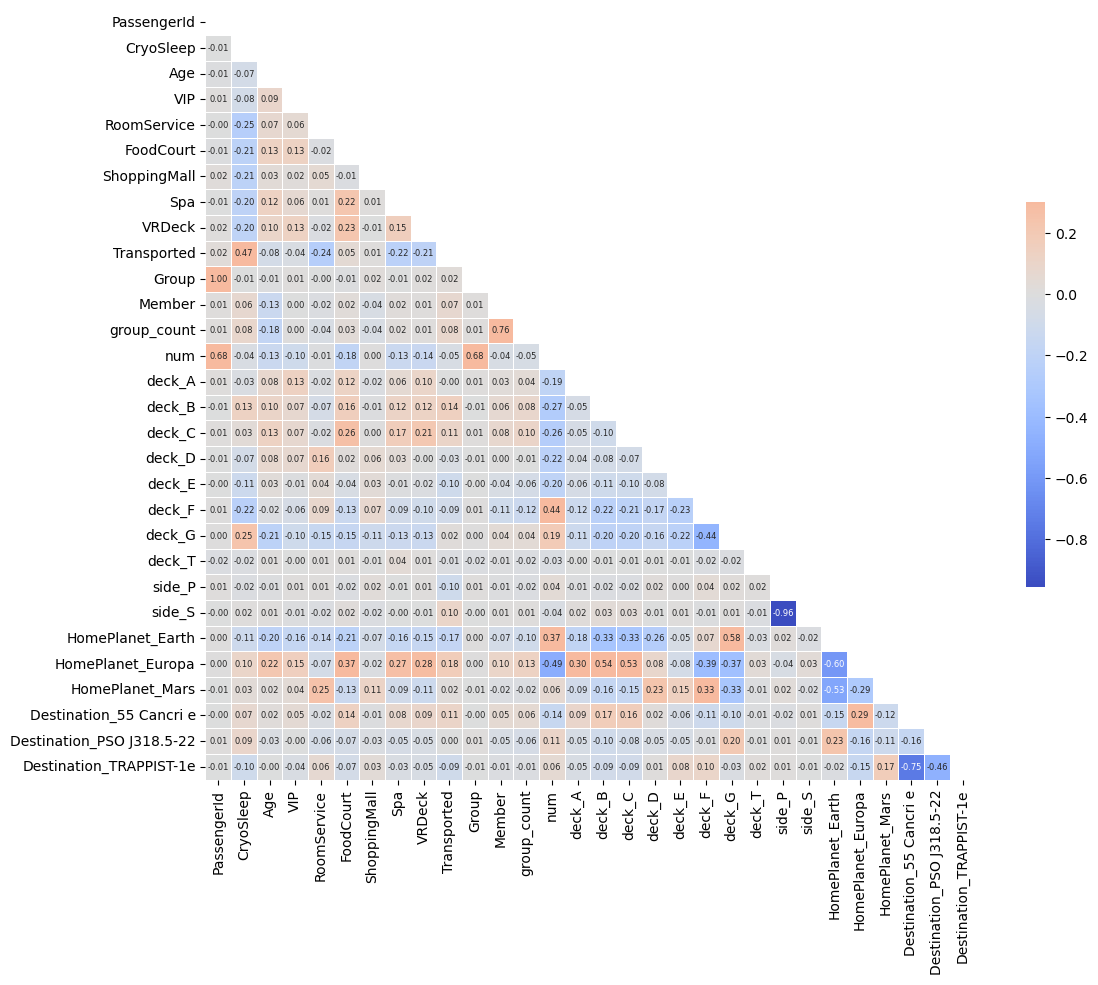

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Ensure numpy is imported

# Assuming corr_matrix is your correlation matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 10))

# Draw the heatmap with smaller annotations
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={"size": 6})  # Adjust font size here
plt.savefig('correlation matrix.svg')
plt.show()

In [19]:
nan_counts_per_column = df.isna().sum()

print(nan_counts_per_column)

PassengerId                    0
CryoSleep                    217
Age                          179
VIP                          203
RoomService                  181
FoodCourt                    183
ShoppingMall                 208
Spa                          183
VRDeck                       188
Transported                    0
Group                          0
Member                         0
group_count                    0
num                          199
deck_A                         0
deck_B                         0
deck_C                         0
deck_D                         0
deck_E                         0
deck_F                         0
deck_G                         0
deck_T                         0
side_P                         0
side_S                         0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
dtype: int